## **Marcel Kurniawan**

## **Import library yang dibutuhkan**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/insurance.csv')

# **1a. Exploratory Data Analysis & Data Preprocessing**

Pada tahap ini saya melakukan beberapa eksplorasi untuk menemukan problem dari data ini yang nantinya akan dilakukan praproses data setelahnya.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


Data ini memiliki 9 fitur dan terdiri dari 2 kolom bertipe float dan 7 kolom bertipe integer. Karena seluruhnya sudah numerical data, maka saya tidak perlu lagi mengganti/encode tipe datanya.

In [ ]:
print(df.isna().sum())

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64


In [ ]:
df.duplicated().sum()

0

Pada data ini tidak terdapat baris yang memiliki missing value dan duplikasi data.

In [ ]:
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


Pada 5 baris teratas dapat terlihat bahwa nilai setiap kolom memiliki skala yang berbeda, oleh karena itu setiap fitur yang akan digunakan harus kita normalisai terlebih dahulu datanya. Karena jika tidak dilakukan normalisasi, fitur yang memiliki rentang nilai yang lebih besar akan memberikan pengaruh yang lebih besar pada model daripada fitur dengan rentang nilai yang lebih kecil

In [ ]:
df.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


Berikut adalah ringkasan statistik deskriptif dari masing-masing kolom. 

<Axes: xlabel='age'>

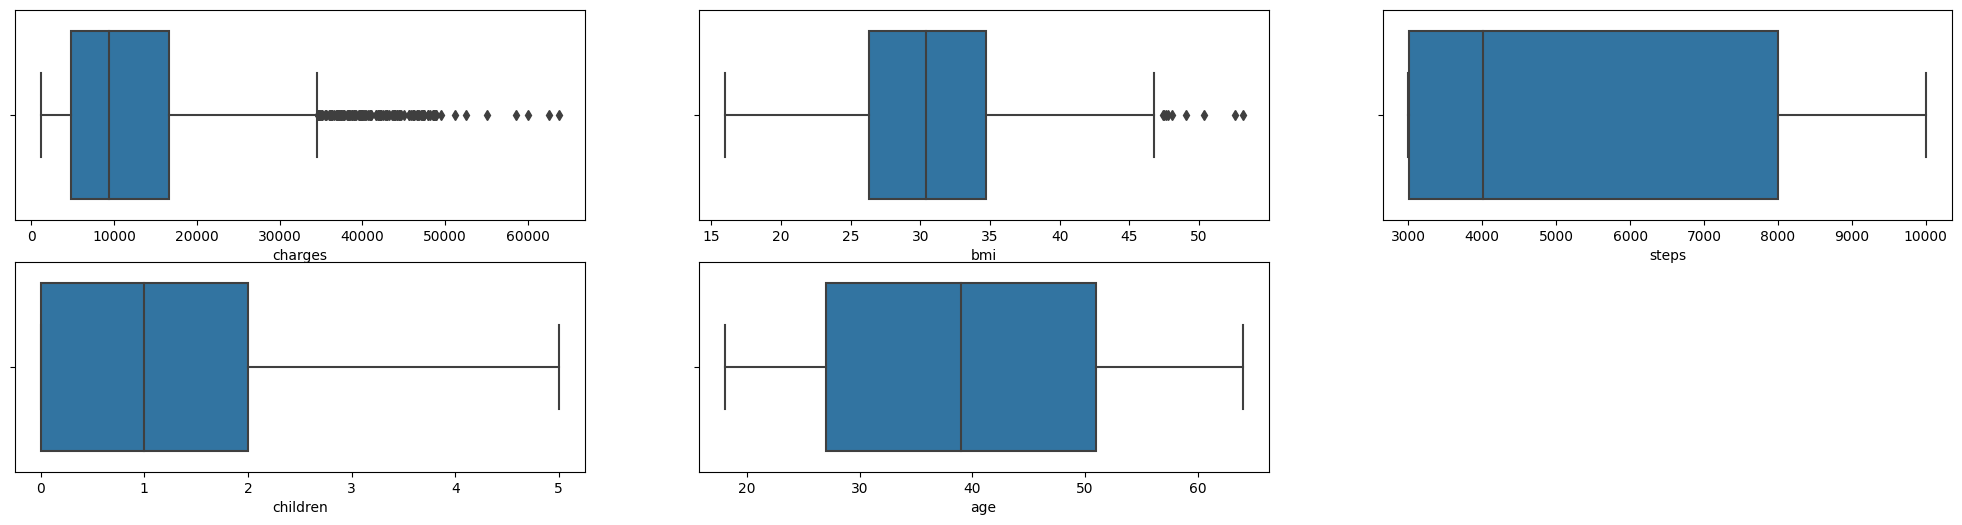

In [ ]:
plt.figure(figsize=(25, 6))
plt.subplot(2, 3, 1)
sns.boxplot(x='charges', data=df)
plt.subplot(2, 3, 2)
sns.boxplot(x='bmi', data=df)
plt.subplot(2, 3, 3)
sns.boxplot(x='steps', data=df)
plt.subplot(2, 3, 4)
sns.boxplot(x='children', data=df)
plt.subplot(2, 3, 5)
sns.boxplot(x='age', data=df)

Pada data charges dan bmi memiliki banya outliers, tetapi pada kasus ini outliers tidak dihilangkan

In [ ]:
df.corr()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,-0.167957,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,-0.039470,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,-0.681149,0.012759,0.003750,0.157566,0.198341,0.384198
steps,-0.167957,-0.039470,-0.681149,1.000000,0.055346,-0.267845,-0.076483,-0.305570,-0.419514
children,0.042469,0.017163,0.012759,0.055346,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,-0.267845,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,-0.076483,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,-0.305570,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.419514,-0.409526,0.333261,0.020891,0.309418,1.000000


<Axes: >

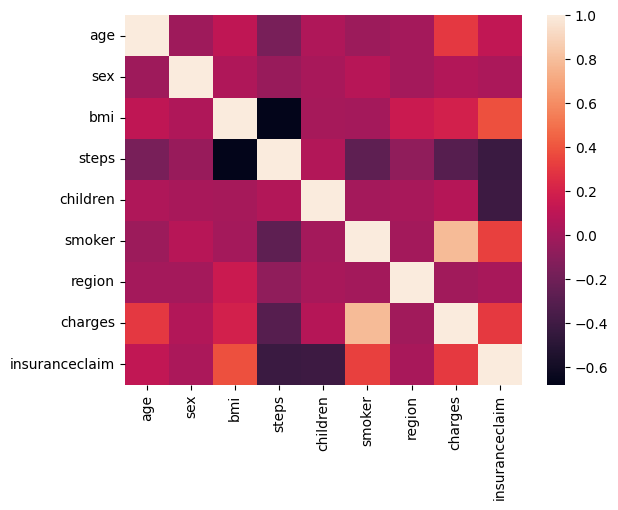

In [ ]:
sns.heatmap(df.corr())

Berdasarkan heatmap diatas, kolom charges dan smoker memiliki korelasi yang paling tinggi yaitu sebesar 0.787

In [ ]:
df['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

Karena pada kasus ini diminta untuk membuat sebuah aplikasi yang membantu
perusahaan untuk menentukan apakah sebuah klaim yang dilakukan seseorang adalah dapat diterima atau ditolak, maka saya melakukan check terhadap fitur insuranceclaim yang berisi dua kelas yaitu ya dan tidak.

Pada data ini memiliki 1338 record dengan dua kelas: ya dan tidak. Kelas "ya" memiliki 783 record (58.5%) dan kelas "tidak" memiliki 555 record (41.5%). Proporsi kelas minoritas adalah 41.5%, yang berada dalam rentang 20-40% untuk data yang tidak seimbang ringan. Jadi, data ini termasuk data yang tidak seimbang ringan.

Namun masalah ini tidak dapat ditangani secara langsung dan meskipun dapat menyebabkan penurunan performa yang tidak signifikan apabila diterapkan pada model.

Maka pada data ini terdapat dua problem yaitu


*   Data imbalance
*   Data tidak memiliki skala yang sama



**Data Preprocessing**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler object
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = ["age","bmi","steps","children","charges"]
df[scaled_data] = scaler.fit_transform(df[scaled_data])

In [ ]:
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,0.021739,0,0.321227,0.001284,0.0,1,3,0.251611,1
1,0.000000,1,0.479150,0.001141,0.2,0,2,0.009636,1
2,0.217391,1,0.458434,0.001284,0.6,0,2,0.053115,0
3,0.326087,1,0.181464,0.999857,0.0,0,1,0.333010,0
4,0.304348,1,0.347592,0.714693,0.0,0,1,0.043816,1


Karena problem pada data ini adalah skala yang tidak sama pada semua kolom, maka setiap data akan dinormalisasi menggunakan MinMax agar semua data memiliki skala yang sama.

Saya memilih MinMax karena scaler ini menskalakan data ke kisaran tetap antara 0 dan 1 serta berguna ketika data memiliki kisaran terbatas.

# **1b. Split Data Training, Test and Validation**

In [ ]:
df_input=df[["age","sex","bmi","steps","children","smoker","region","charges"]]
df_target=df[['insuranceclaim']]

from sklearn.model_selection import train_test_split

#split training and testing data
X_train, X_test, y_train, y_test = train_test_split(df_input, df_target, test_size=0.2)

#split testing and validation data
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [ ]:
print("Training :", len(X_train))
print("Testing :", len(X_val))
print("Validation :", len(X_test))

Training : 1070
Testing : 134
Validation : 134


Split data menjadi tiga bagian yaitu data training sebanyak 80%, data test sebanyak 10% dan data validasi sebanyak 10% menggunakan sklearn

# **1c. Baseline Architecture**

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential

n = 8
num_classes = 1

model_1c = keras.models.Sequential()
model_1c.add(tf.keras.Input(shape=(n,)))

model_1c.add(keras.layers.core.Dense(2 * n, activation='relu', name="HiddenLayer_1"))
model_1c.add(keras.layers.core.Dense(2 * n, activation='relu', name="HiddenLayer_2"))
model_1c.add(keras.layers.core.Dense(num_classes, activation='sigmoid', name="OutputLayer"))

model_1c.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

print(model_1c.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer_1 (Dense)       (None, 16)                144       
                                                                 
 HiddenLayer_2 (Dense)       (None, 16)                272       
                                                                 
 OutputLayer (Dense)         (None, 1)                 17        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None


Arsitektur baseline sesuai dengan kriteria soal dimana terdapat n nodes pada input layer, 2 buah hidden layer dengan banyak 2 x n nodes awal dan output layer banyak kelasnya 1 karena menggunakan activation function sigmoid dan menggunakan RelU untuk setiap hidden layernya.

Pada model arsitektur baseline ini saya menggunakan optimizer sgd dan loss menggunakan binary_crossentropy.

In [ ]:
history=model_1c.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
34/34 [==============================] - 1s 8ms/step - loss: 0.6591 - accuracy: 0.6103 - val_loss: 0.6349 - val_accuracy: 0.6642
Epoch 2/10
34/34 [==============================] - 0s 3ms/step - loss: 0.6317 - accuracy: 0.6467 - val_loss: 0.6201 - val_accuracy: 0.6642
Epoch 3/10
34/34 [==============================] - 0s 3ms/step - loss: 0.6203 - accuracy: 0.6523 - val_loss: 0.6103 - val_accuracy: 0.6567
Epoch 4/10
34/34 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.6729 - val_loss: 0.6019 - val_accuracy: 0.6716
Epoch 5/10
34/34 [==============================] - 0s 2ms/step - loss: 0.6036 - accuracy: 0.6888 - val_loss: 0.5941 - val_accuracy: 0.6642
Epoch 6/10
34/34 [==============================] - 0s 4ms/step - loss: 0.5956 - accuracy: 0.6963 - val_loss: 0.5862 - val_accuracy: 0.6716
Epoch 7/10
34/34 [==============================] - 0s 4ms/step - loss: 0.5880 - accuracy: 0.7093 - val_loss: 0.5785 - val_accuracy: 0.6716
Epoch 8/10
34/34 [==

Pada model ini akurasi yang dihasilkan sebesar kurang lebih nilai accuracy seperti pada output diatas

# **1d. Modifikasi Arsitektur Baseline**

Pada no.1d saya mengganti dan tuning hyperparameter sepreti merubah optimizer menjadi adam, mengubah learning rate menjadi 0.01,  merubah epoch serta merubah arsitkur model dengan menambahkan 1 hidden layer dan menambahkan jumlah neuron pada setiap layer. Alasan:

*   Saya menganti optimizer dari sgd menjadi adam karena, optimizer adam lebih cocok untuk digunakan pada kasus klasifikasi.
*   Saya merubah epoch untuk menemukan titik optimal dalam proses training, di mana model mampu mempelajari pola yang paling relevan pada data tanpa terlalu overfitting pada data training. 
*   Dengan menambahkan hidden layer dan meningkatkan jumlah neuron pada setiap layer, dapat meningkatkan kapasitas model dan memberikan kemampuan lebih dalam mempelajari fitur-fitur yang terdapat pada data.
*   Saya merubah learning rate menjadi 0.01 untuk menemukan nilai yang optimal agar model dapat mencapai konvergensi dengan cepat dan stabil.

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential

n = 8  
num_classes = 1

model_1d = keras.models.Sequential(name="Model_1d")
model_1d.add(tf.keras.Input(shape=(n,)))

model_1d.add(keras.layers.core.Dense(2 * n * 3, activation='relu', name="HiddenLayer_1"))
model_1d.add(keras.layers.core.Dense(2 * n * 3, activation='relu', name="HiddenLayer_2"))
model_1d.add(keras.layers.core.Dense(2 * n * 3, activation='relu', name="HiddenLayer_3"))
model_1d.add(keras.layers.core.Dense(num_classes, activation='sigmoid', name="OutputLayer"))

opt = keras.optimizers.Adam(learning_rate=0.01)

model_1d.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

print(model_1d.summary())

Model: "Model_1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer_1 (Dense)       (None, 48)                432       
                                                                 
 HiddenLayer_2 (Dense)       (None, 48)                2352      
                                                                 
 HiddenLayer_3 (Dense)       (None, 48)                2352      
                                                                 
 OutputLayer (Dense)         (None, 1)                 49        
                                                                 
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history=model_1d.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
34/34 [==============================] - 1s 19ms/step - loss: 0.5245 - accuracy: 0.7355 - val_loss: 0.4566 - val_accuracy: 0.8060
Epoch 2/20
34/34 [==============================] - 0s 7ms/step - loss: 0.4073 - accuracy: 0.8168 - val_loss: 0.4116 - val_accuracy: 0.8507
Epoch 3/20
34/34 [==============================] - 0s 5ms/step - loss: 0.4006 - accuracy: 0.8271 - val_loss: 0.3772 - val_accuracy: 0.7985
Epoch 4/20
34/34 [==============================] - 0s 4ms/step - loss: 0.3506 - accuracy: 0.8505 - val_loss: 0.3894 - val_accuracy: 0.7910
Epoch 5/20
34/34 [==============================] - 0s 4ms/step - loss: 0.3327 - accuracy: 0.8626 - val_loss: 0.3054 - val_accuracy: 0.8955
Epoch 6/20
34/34 [==============================] - 0s 4ms/step - loss: 0.3060 - accuracy: 0.8626 - val_loss: 0.3325 - val_accuracy: 0.8433
Epoch 7/20
34/34 [==============================] - 0s 4ms/step - loss: 0.2863 - accuracy: 0.8766 - val_loss: 0.2784 - val_accuracy: 0.9030
Epoch 8/20
34/34 [=

In [ ]:
test_loss, test_acc1 = model_1c.evaluate(X_test, y_test)
test_loss, test_acc2 = model_1d.evaluate(X_test, y_test)
print('Test accuracy:', test_acc1)
print('Test accuracy:', test_acc2)

5/5 [==============================] - 0s 3ms/step - loss: 0.2225 - accuracy: 0.8881
Test accuracy: 0.7313432693481445
Test accuracy: 0.888059675693512


Dengan melakukan tuning hyperparameter dan arsitekturnya, performa dan akurasi yang dihasilkan oleh model_1d lebih baik dibandingkan model_1c

# **1e. Evaluasi Arsitektur**

Evaluasi untuk model 1c

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential

n = 8
num_classes = 1

model_1ce = keras.models.Sequential()
model_1ce.add(tf.keras.Input(shape=(n,)))

model_1ce.add(keras.layers.core.Dense(2 * n, activation='relu', name="HiddenLayer_1"))
model_1ce.add(keras.layers.core.Dense(2 * n, activation='relu', name="HiddenLayer_2"))
model_1ce.add(keras.layers.core.Dense(num_classes, activation='sigmoid', name="OutputLayer"))

model_1ce.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

print(model_1ce.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer_1 (Dense)       (None, 16)                144       
                                                                 
 HiddenLayer_2 (Dense)       (None, 16)                272       
                                                                 
 OutputLayer (Dense)         (None, 1)                 17        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history=model_1ce.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
34/34 [==============================] - 1s 12ms/step - loss: 0.7296 - accuracy: 0.4495 - precision_5: 0.6051 - recall_3: 0.1873 - val_loss: 0.7080 - val_accuracy: 0.5149 - val_precision_5: 0.6032 - val_recall_3: 0.4872
Epoch 2/10
34/34 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5374 - precision_5: 0.5960 - recall_3: 0.6651 - val_loss: 0.6886 - val_accuracy: 0.5075 - val_precision_5: 0.5526 - val_recall_3: 0.8077
Epoch 3/10
34/34 [==============================] - 0s 5ms/step - loss: 0.6788 - accuracy: 0.5664 - precision_5: 0.5832 - recall_3: 0.9238 - val_loss: 0.6770 - val_accuracy: 0.5597 - val_precision_5: 0.5725 - val_recall_3: 0.9615
Epoch 4/10
34/34 [==============================] - 0s 5ms/step - loss: 0.6705 - accuracy: 0.5841 - precision_5: 0.5882 - recall_3: 0.9794 - val_loss: 0.6683 - val_accuracy: 0.5821 - val_precision_5: 0.5821 - val_recall_3: 1.0000
Epoch 5/10
34/34 [==============================] - 0s 5ms/step - loss: 0.6637 

In [ ]:
test_loss, test_acc, test_prec, test_rec = model_1ce.evaluate(X_test, y_test)
f1_score = 2 * (test_prec * test_rec) / (test_prec + test_rec)
print('Test Accuracy:', test_acc)
print('Test Precision:', test_prec)
print('Test Recall:', test_rec)
print('Test F1 Score:', f1_score)

5/5 [==============================] - 0s 4ms/step - loss: 0.6415 - accuracy: 0.5821 - precision_5: 0.5736 - recall_3: 0.9867
Test Accuracy: 0.5820895433425903
Test Precision: 0.5736433863639832
Test Recall: 0.9866666793823242
Test F1 Score: 0.7254901799312095


**Ringkasan Evaluasi**

*   Accuracy adalah ukuran seberapa baik model klasifikasi memprediksi label yang benar. Ini dihitung dengan membagi jumlah prediksi yang benar dengan jumlah total prediksi. Dalam kasus ini, accuracy adalah 0.5820895433425903, yang berarti model ini benar sekitar 58%.
*   Precision adalah ukuran seberapa banyak prediksi positif yang benar-benar positif. Dalam kasus ini, precision adalah 0.5736433863639832, yang berarti dari semua prediksi positif yang dibuat oleh model ini, sekitar 57% adalah benar.

*   Recall adalah ukuran seberapa banyak positif aktual yang diprediksi dengan benar. Dalam kasus ini, test recall adalah 0.9866666793823242, yang berarti dari semua positif aktual dalam data ini, sekitar 99% diprediksi dengan benar oleh model ini.

*   F1 Score adalah ukuran keseimbangan antara test precision dan test recall. Dalam kasus ini, F1 Score adalah 0.7254901799312095, yang berarti model ini memiliki kinerja yang baik dalam hal presisi dan recall sebesar 73%.


Berdasarkan hasil tersebut, model ini sudah cukup baik dari akurasi dan memiliki keseimbangan (F1 Score) yang cukup baik antara precision dan recall, namun untuk memperbaiki performa model ini, harus dilakukan dengan cara mengganti hyperparameter dan merubah arsitektur baseline model ini pada model 1d.

Evaluasi model 1d

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential

n = 8  
num_classes = 1

model_1ed = keras.models.Sequential(name="Model_1d")
model_1ed.add(tf.keras.Input(shape=(n,)))

model_1ed.add(keras.layers.core.Dense(2 * n * 5, activation='relu', name="HiddenLayer_1"))
model_1ed.add(keras.layers.core.Dense(2 * n * 5, activation='relu', name="HiddenLayer_2"))
model_1ed.add(keras.layers.core.Dense(2 * n * 5, activation='relu', name="HiddenLayer_3"))
model_1ed.add(keras.layers.core.Dense(num_classes, activation='sigmoid', name="OutputLayer"))

opt = keras.optimizers.Adam(learning_rate=0.01)

model_1ed.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

print(model_1ed.summary())

Model: "Model_1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer_1 (Dense)       (None, 80)                720       
                                                                 
 HiddenLayer_2 (Dense)       (None, 80)                6480      
                                                                 
 HiddenLayer_3 (Dense)       (None, 80)                6480      
                                                                 
 OutputLayer (Dense)         (None, 1)                 81        
                                                                 
Total params: 13,761
Trainable params: 13,761
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history=model_1ed.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
34/34 [==============================] - 2s 13ms/step - loss: 0.5145 - accuracy: 0.7542 - precision_3: 0.7793 - recall_1: 0.8127 - val_loss: 0.4183 - val_accuracy: 0.7985 - val_precision_3: 0.8806 - val_recall_1: 0.7564
Epoch 2/20
34/34 [==============================] - 0s 3ms/step - loss: 0.3720 - accuracy: 0.8402 - precision_3: 0.8768 - recall_1: 0.8476 - val_loss: 0.3685 - val_accuracy: 0.8507 - val_precision_3: 0.8919 - val_recall_1: 0.8462
Epoch 3/20
34/34 [==============================] - 0s 3ms/step - loss: 0.3723 - accuracy: 0.8514 - precision_3: 0.8829 - recall_1: 0.8619 - val_loss: 0.3704 - val_accuracy: 0.8134 - val_precision_3: 0.9077 - val_recall_1: 0.7564
Epoch 4/20
34/34 [==============================] - 0s 3ms/step - loss: 0.3374 - accuracy: 0.8579 - precision_3: 0.8931 - recall_1: 0.8619 - val_loss: 0.3473 - val_accuracy: 0.8507 - val_precision_3: 0.8537 - val_recall_1: 0.8974
Epoch 5/20
34/34 [==============================] - 0s 3ms/step - loss: 0.3043 

In [ ]:
test_loss, test_acc, test_prec, test_rec = model_1ed.evaluate(X_test, y_test)
f1_score = 2 * (test_prec * test_rec) / (test_prec + test_rec)
print('Test Accuracy:', test_acc)
print('Test Precision:', test_prec)
print('Test Recall:', test_rec)
print('Test F1 Score:', f1_score)

5/5 [==============================] - 0s 3ms/step - loss: 0.1635 - accuracy: 0.9328 - precision_3: 0.9231 - recall_1: 0.9600
Test Accuracy: 0.9328358173370361
Test Precision: 0.9230769276618958
Test Recall: 0.9599999785423279
Test F1 Score: 0.941176462659282


**Ringkasan Evaluasi**

*   Accuracy adalah ukuran seberapa baik model klasifikasi memprediksi label yang benar, dihitung dengan membagi jumlah prediksi yang benar dengan jumlah total prediksi. Dalam kasus ini, accuracy adalah 0.9328358173370361, yang berarti model ini benar sekitar 93%.

*   Precision adalah ukuran seberapa banyak prediksi positif yang benar-benar positif. Dalam kasus ini, precision adalah 0.9230769276618958, yang berarti dari semua prediksi positif yang dibuat oleh model ini, sekitar 92% adalah benar.


*   Recall adalah ukuran seberapa banyak positif aktual yang diprediksi dengan 
benar. Dalam kasus ini, test recall adalah 0.9599999785423279, yang berarti dari semua positif aktual dalam data ini, sekitar 96% diprediksi dengan benar oleh model ini.


*   F1 Score adalah ukuran keseimbangan antara test precision dan test recall. Dalam kasus ini, F1 Score adalah 0.941176462659282, yang berarti model ini memiliki kinerja yang baik dalam hal presisi dan recall, sekitar 94%.

Dapat disimpulkan bahwa nilai-nilai ini menunjukkan bahwa model_1d memiliki akurasi, precision, recall dan F1 Score yang cukup tinggi, yang berarti bahwa model ini dapat mengklasifikasikan data dengan baik